In [21]:
import re
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from typing import List, Tuple
from matplotlib_venn import venn3
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
whole_dict = {
    'protected': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/0_protected_titles.csv')
    },
    'excellent': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/0_excellent_titles.csv')
    },
    'readworthy': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/0_readworthy_titles.csv')
    },
}


In [32]:
def preprocess_string(s: str) -> List[str]:
    # Split the string into sentences, then split each sentence into words
    words = re.findall(r'\b\w+\b', s)
    return words

def similarity_and_venn_diagram(strings_a: List[str], strings_b: List[str], strings_c: List[str]) -> Tuple[float, float, float]:
    words_a = {str(word) for s in strings_a for word in strings_a}
    words_b = {str(word) for s in strings_b for word in strings_b}
    words_c = {str(word) for s in strings_c for word in strings_c}

    intersection_ab = words_a.intersection(words_b)
    intersection_ac = words_a.intersection(words_c)
    intersection_bc = words_b.intersection(words_c)
    intersection_abc = words_a.intersection(words_b, words_c)

    union = words_a.union(words_b, words_c)
    
    current_palette = sns.color_palette()

    color_a, color_b, color_c = current_palette[0], current_palette[1], current_palette[2]


    similarity_ab = len(intersection_ab) / len(union)
    similarity_ac = len(intersection_ac) / len(union)
    similarity_bc = len(intersection_bc) / len(union)
    
    plt.figure()
    venn3([words_a, words_b, words_c], set_labels=('Protected', 'Excellent', 'Readworthy'), set_colors=(color_a, color_b, color_c))
    # plt.title(f"Similarity AB: {similarity_ab:.2f}, AC: {similarity_ac:.2f}, BC: {similarity_bc:.2f}")
    plt.title("Overlap of articles in article origins")
    plt.show()

    return similarity_ab, similarity_ac, similarity_bc, len(intersection_abc)


In [34]:
sns.set_palette("deep", desat=1)

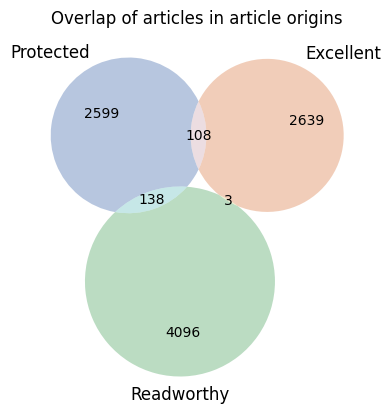

(0.011269957215903162, 0.014400500886987374, 0.00031305436710842114, 0)

In [35]:
similarity_and_venn_diagram(list(whole_dict['protected']['titles']['title']),
                            list(whole_dict['excellent']['titles']['title']),
                            list(whole_dict['readworthy']['titles']['title']))


In [24]:
current_palette = sns.color_palette()

color_a, color_b, color_c = current_palette[0], current_palette[1], current_palette[2]

print(color_a)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)


In [4]:
def print_common_items(list1, list2):
    # Convert the lists to sets
    set1 = set(list1)
    set2 = set(list2)

    # Find the intersection
    common_items = set1 & set2
    
    common_count = []
    # Print the common items
    for item in common_items:
        common_count.append(item)
    return common_count

In [5]:
a = print_common_items(whole_dict['excellent']['titles']['title'],
                   whole_dict['readworthy']['titles']['title'])
print((a))

['Blackpool Tower', 'Choanozoa', 'Höllengebirge']
